In [ ]:
import numpy
import pandas
import sklearn

print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)
print("scikit-learn version:", sklearn.__version__)


NumPy version: 1.24.4
Pandas version: 2.2.2
scikit-learn version: 1.6.1


In [ ]:
!pip install numpy==1.24.4 pandas==2.2.2 scikit-learn==1.6.1


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
fertilizer = pd.read_csv("Fertilizer Prediction.csv")

# New Section

In [ ]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
fertilizer.shape

(99, 9)

In [ ]:


fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
fertilizer.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [ ]:
fertilizer.duplicated().sum()

0

In [ ]:
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
fertilizer.corr(numeric_only=True)


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


<Axes: >

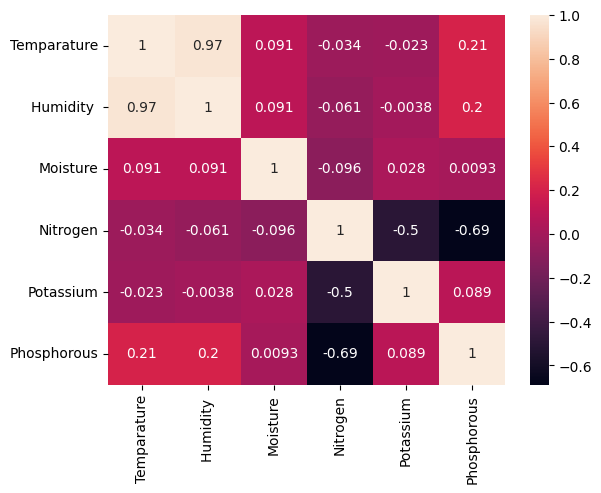

In [ ]:
import seaborn as sns
sns.heatmap(fertilizer.corr(numeric_only = True),annot = True,cbar = True,)

In [ ]:
fertilizer['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
Urea,22
DAP,18
28-28,17
14-35-14,14
20-20,14
17-17-17,7
10-26-26,7


<ipython-input-43-23d101d2f907>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fertilizer['Phosphorous'])


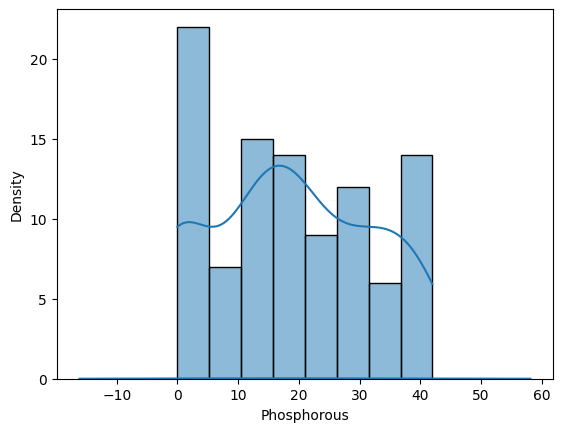

In [ ]:



import matplotlib.pyplot as plt
sns.distplot(fertilizer['Phosphorous'])
sns.histplot(fertilizer['Phosphorous'], kde=True)
plt.show()

<ipython-input-44-1235f58d7faa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fertilizer['Phosphorous'])


<Axes: xlabel='Phosphorous', ylabel='Density'>

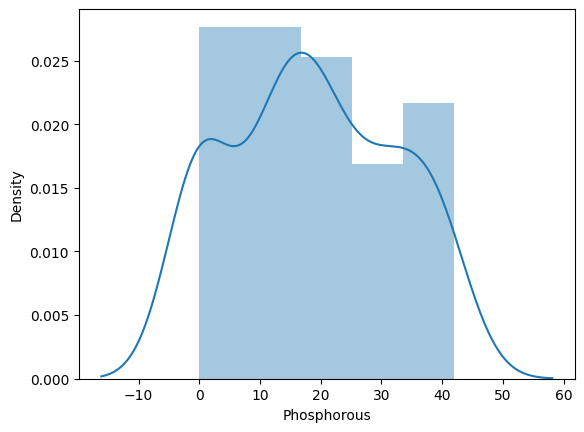

In [ ]:

sns.distplot(fertilizer['Phosphorous'])

In [ ]:
fertilizer['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
fertilizer_dict = {
    'Urea' : 1,
    'DAP' : 2,
    '14-35-14' : 3,
    '28-28' : 4,
    '17-17-17': 5,
    '20-20': 6,
    '10-26-26' : 7
}

fertilizer['Fertilizer Name'] = fertilizer['Fertilizer Name'].map(fertilizer_dict)

In [ ]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [ ]:
fertilizer['Fertilizer Name'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_soil = LabelEncoder()
lb_crop = LabelEncoder()
fertilizer["Soil Type"]=lb_soil.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb_crop.fit_transform(fertilizer['Crop Type'])


In [ ]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [ ]:

x = fertilizer.drop('Fertilizer Name',axis=1)
y = fertilizer['Fertilizer Name']
#shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

#shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [ ]:

accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


In [ ]:
fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:

def recommend_fertilizer(Temperature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    global lb_soil, lb_crop, sc

    if isinstance(Soil_Type, str):
        if Soil_Type in getattr(lb_soil, "classes_", []):
            Soil_Type = lb_soil.transform([Soil_Type])[0]
        else:
            return f"Error: Unrecognized Soil Type '{Soil_Type}'"

    if isinstance(Crop_Type, str):
        if Crop_Type in getattr(lb_crop, "classes_", []):
            Crop_Type = lb_crop.transform([Crop_Type])[0]
        else:
            return f"Error: Unrecognized Crop Type '{Crop_Type}'"

    features = np.array([[Temperature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)

    prediction = model.predict(transformed_features)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}

    return f"{fert_dict[prediction[0]]} is the best fertilizer for the given conditions."

Temperature = 34
Humidity = 62
Moisture = 12
Soil_Type = "Loamy"
Crop_Type = "Cotton"
Nitrogen = 11
Potassium = 18
Phosphorous = 19

print(recommend_fertilizer(Temperature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous))


10-26-26 is the best fertilizer for the given conditions.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
# Save trained fertilizer model
with open('fert_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save scaler
with open('fert_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

# Save label encoders
with open('soil_encoder.pkl', 'wb') as f:
    pickle.dump(lb_soil, f)

with open('crop_encoder.pkl', 'wb') as f:
    pickle.dump(lb_crop, f)


In [ ]:

from google.colab import files

files.download('fert_model.pkl')
files.download('fert_scaler.pkl')
files.download('soil_encoder.pkl')
files.download('crop_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>